In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Paths using pathlib with relative paths
PROJECT_DIR = Path('../')
RESULTS_DIR = PROJECT_DIR / 'results'

print("Setup complete!")

Setup complete!


In [2]:
# Load test data
X_test = pd.read_csv(RESULTS_DIR / 'X_test.csv')
y_test = pd.read_csv(RESULTS_DIR / 'y_test.csv')['medv']
X_train = pd.read_csv(RESULTS_DIR / 'X_train.csv')
y_train = pd.read_csv(RESULTS_DIR / 'y_train.csv')['medv']

print(f"Training samples: {len(y_train)}")
print(f"Test samples: {len(y_test)}")
print(f"Features: {X_test.shape[1]}")

Training samples: 354
Test samples: 152
Features: 13


In [3]:
# Load all models and predictions
models = {}
predictions = {}
metrics = {}

# Linear models
models['Linear Univariate'] = joblib.load(RESULTS_DIR / 'linear_univariate.joblib')
predictions['Linear Univariate'] = np.load(RESULTS_DIR / 'pred_linear_univariate.npy')
with open(RESULTS_DIR / 'metrics_linear_univariate.json') as f:
    metrics['Linear Univariate'] = json.load(f)

models['Linear Multivariate'] = joblib.load(RESULTS_DIR / 'linear_multivariate.joblib')
predictions['Linear Multivariate'] = np.load(RESULTS_DIR / 'pred_linear_multivariate.npy')
with open(RESULTS_DIR / 'metrics_linear_multivariate.json') as f:
    metrics['Linear Multivariate'] = json.load(f)

models['Linear Feature Selection'] = joblib.load(RESULTS_DIR / 'linear_feature_selection.joblib')
predictions['Linear Feature Selection'] = np.load(RESULTS_DIR / 'pred_linear_feature_selection.npy')
with open(RESULTS_DIR / 'metrics_linear_feature_selection.json') as f:
    metrics['Linear Feature Selection'] = json.load(f)

# Polynomial models
models['Polynomial Degree 2'] = joblib.load(RESULTS_DIR / 'polynomial_degree2.joblib')
predictions['Polynomial Degree 2'] = np.load(RESULTS_DIR / 'pred_polynomial_degree2.npy')
with open(RESULTS_DIR / 'metrics_polynomial_degree2.json') as f:
    metrics['Polynomial Degree 2'] = json.load(f)

models['Polynomial Degree 3'] = joblib.load(RESULTS_DIR / 'polynomial_degree3.joblib')
predictions['Polynomial Degree 3'] = np.load(RESULTS_DIR / 'pred_polynomial_degree3.npy')
with open(RESULTS_DIR / 'metrics_polynomial_degree3.json') as f:
    metrics['Polynomial Degree 3'] = json.load(f)

# SGD models
models['SGD Constant'] = joblib.load(RESULTS_DIR / 'SGD_constant.joblib')
predictions['SGD Constant'] = np.load(RESULTS_DIR / 'pred_SGD_constant.npy')
with open(RESULTS_DIR / 'metrics_SGD_constant.json') as f:
    metrics['SGD Constant'] = json.load(f)

models['SGD Adaptive'] = joblib.load(RESULTS_DIR / 'SGD_adaptive.joblib')
predictions['SGD Adaptive'] = np.load(RESULTS_DIR / 'pred_SGD_adaptive.npy')
with open(RESULTS_DIR / 'metrics_SGD_adaptive.json') as f:
    metrics['SGD Adaptive'] = json.load(f)

print(f"Loaded {len(models)} models")

Loaded 7 models


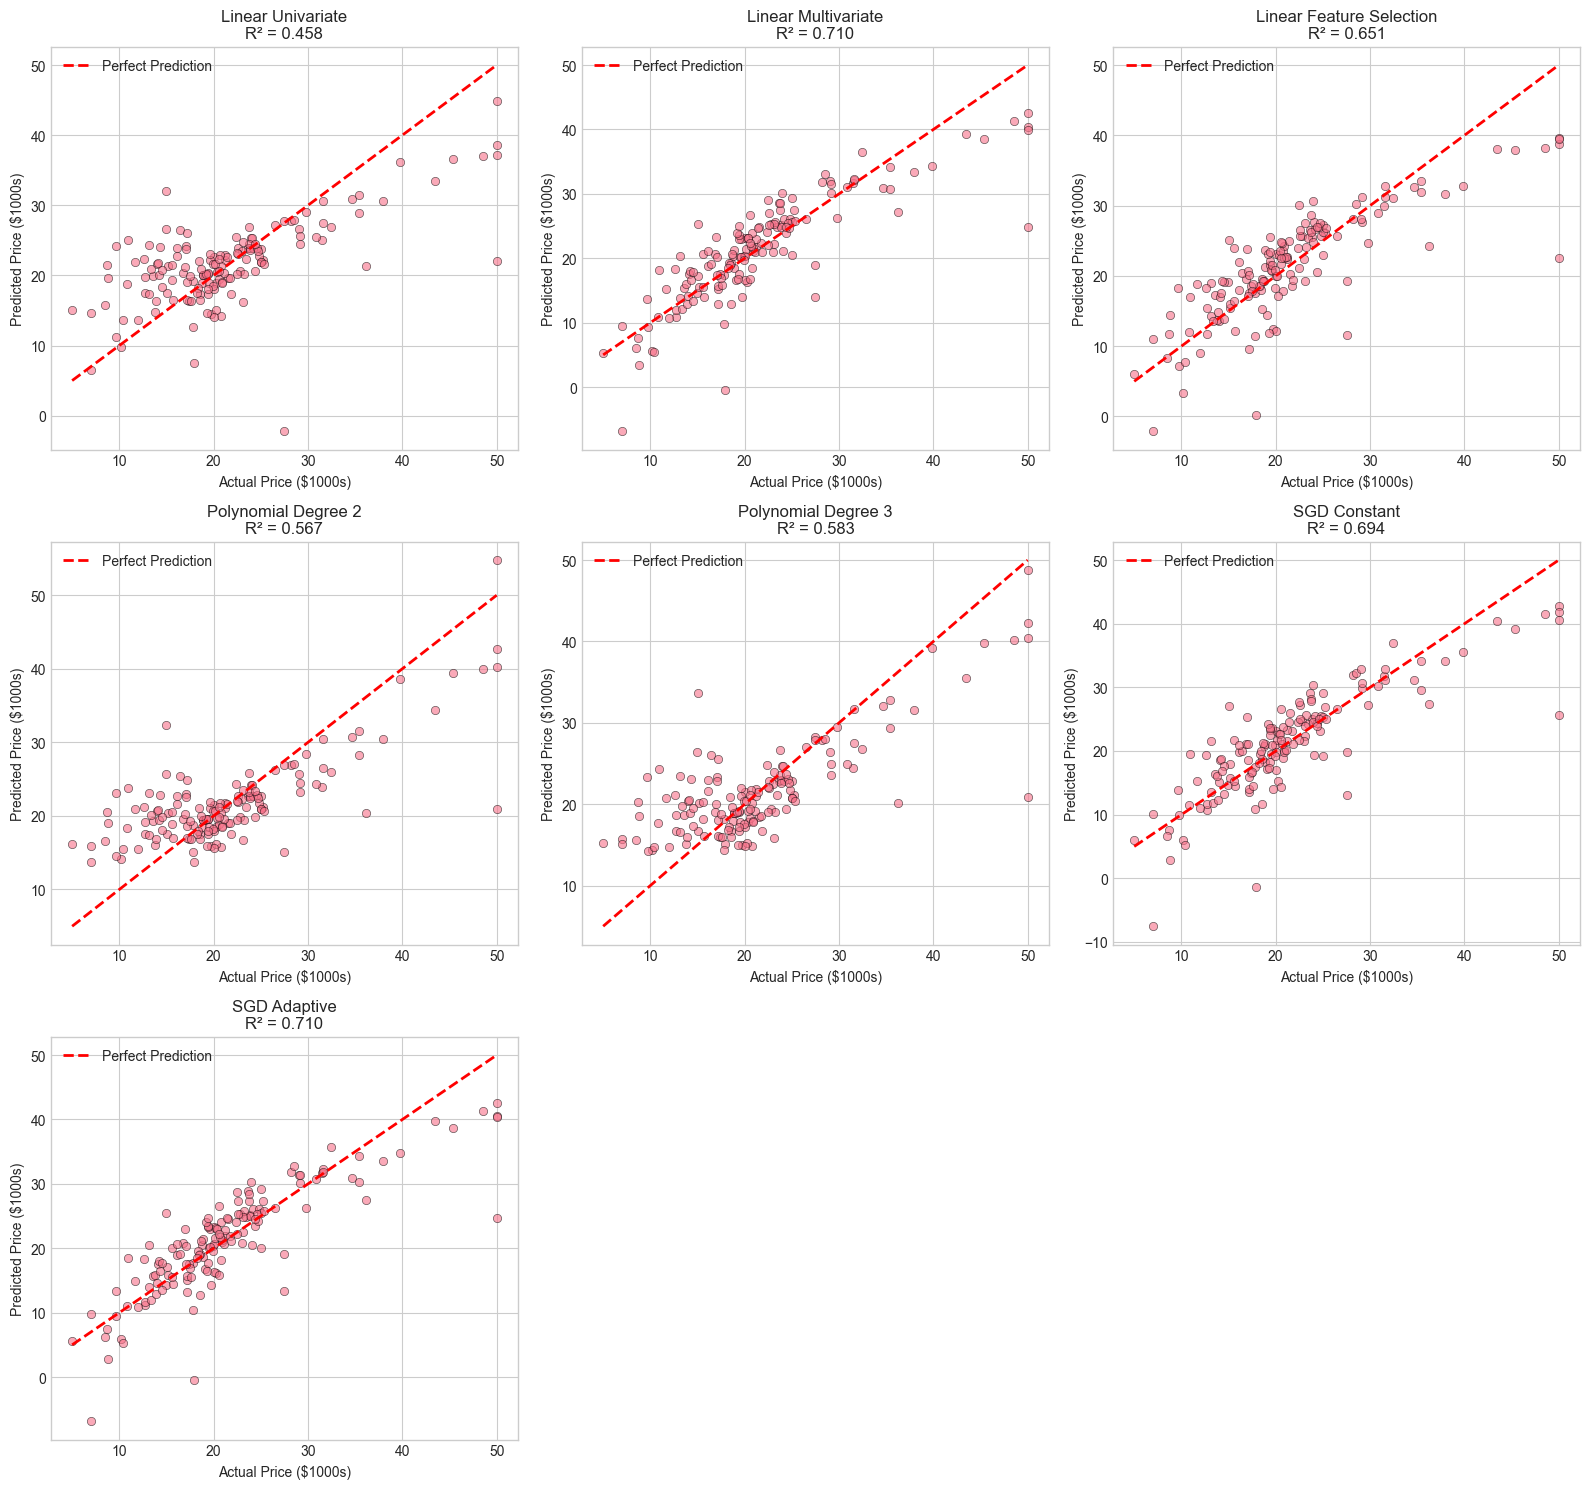

Saved: actual_vs_predicted.png


In [4]:
# 1. ACTUAL VS PREDICTED PLOTS
n_models = len(predictions)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten()

model_names = list(predictions.keys())

for idx, (name, pred) in enumerate(predictions.items()):
    ax = axes[idx]
    ax.scatter(y_test, pred, alpha=0.6, edgecolors="k", linewidths=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction")
    ax.set_xlabel("Actual Price ($1000s)")
    ax.set_ylabel("Predicted Price ($1000s)")
    ax.set_title(f"{name}\nR² = {metrics[name]["test_r2"]:.3f}")
    ax.legend()

# Hide unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/actual_vs_predicted.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: actual_vs_predicted.png")

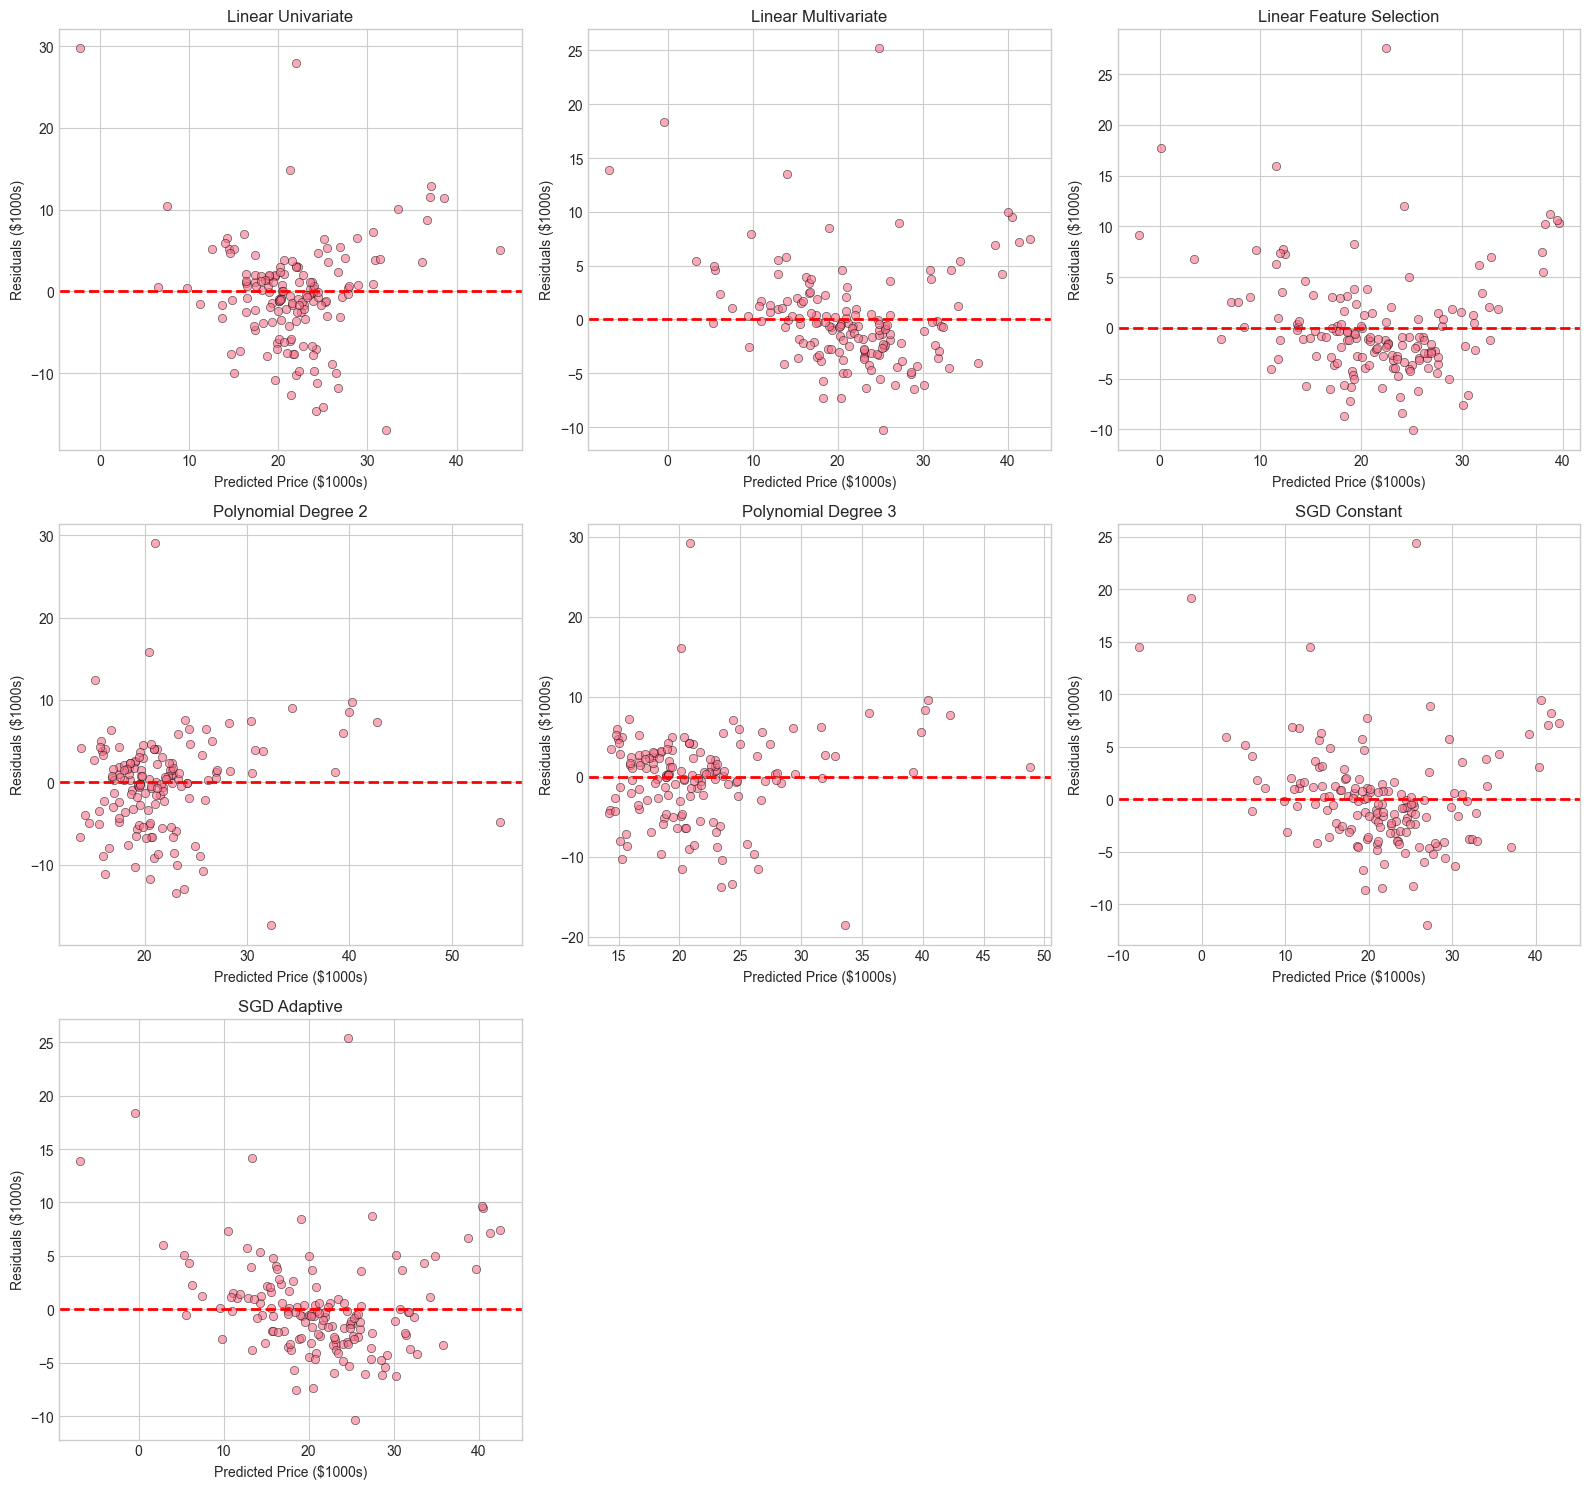

Saved: residual_plots.png


In [5]:
# 2. RESIDUAL PLOTS
n_models = len(predictions)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten()

for idx, (name, pred) in enumerate(predictions.items()):
    ax = axes[idx]
    residuals = y_test - pred
    ax.scatter(pred, residuals, alpha=0.6, edgecolors="k", linewidths=0.5)
    ax.axhline(y=0, color="r", linestyle="--", lw=2)
    ax.set_xlabel("Predicted Price ($1000s)")
    ax.set_ylabel("Residuals ($1000s)")
    ax.set_title(f"{name}")

for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/residual_plots.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: residual_plots.png")

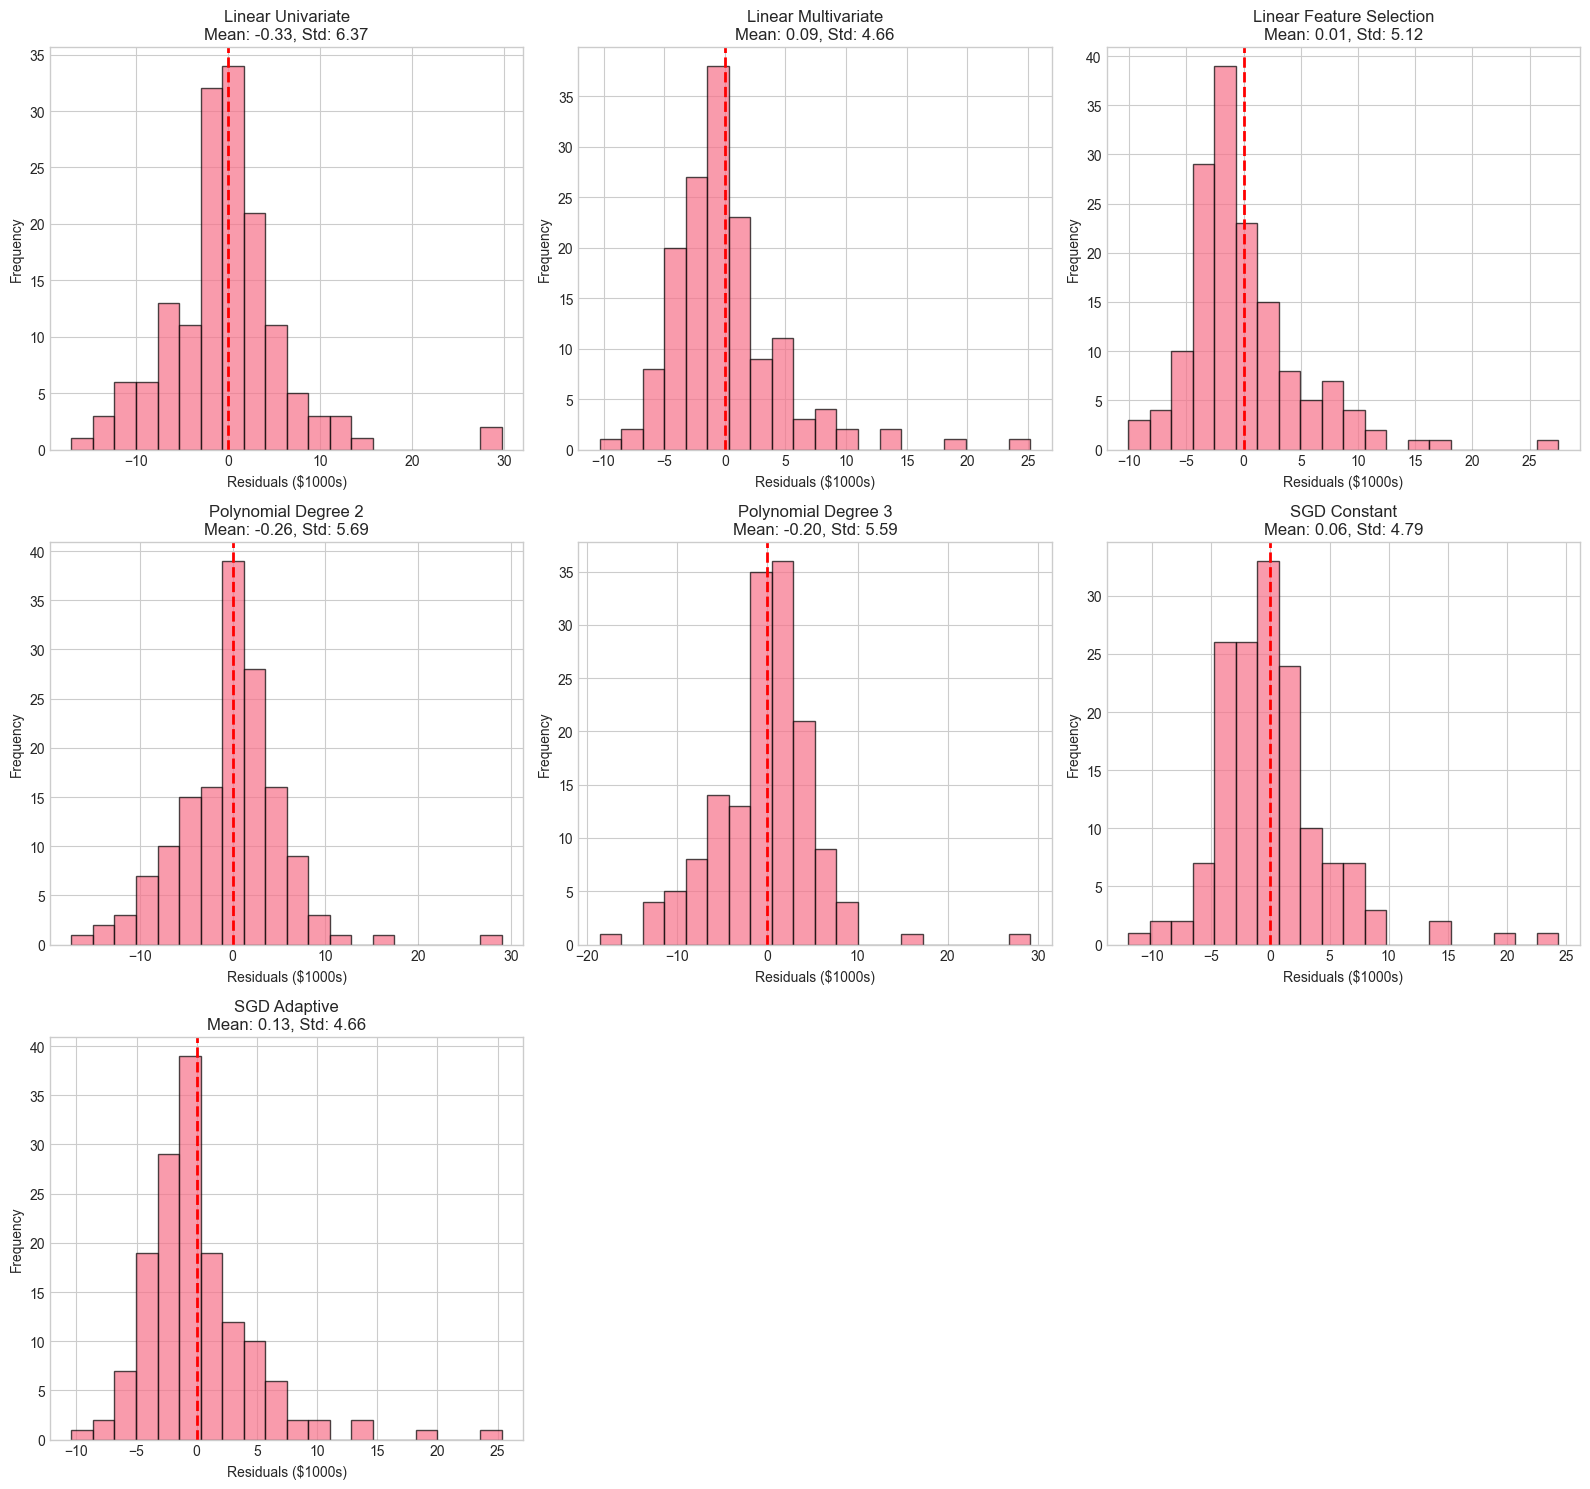

Saved: residual_distribution.png


In [6]:
# 3. RESIDUAL DISTRIBUTION
n_models = len(predictions)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten()

for idx, (name, pred) in enumerate(predictions.items()):
    ax = axes[idx]
    residuals = y_test - pred
    ax.hist(residuals, bins=20, edgecolor="black", alpha=0.7)
    ax.axvline(x=0, color="r", linestyle="--", lw=2)
    ax.set_xlabel("Residuals ($1000s)")
    ax.set_ylabel("Frequency")
    ax.set_title(f"{name}\nMean: {residuals.mean():.2f}, Std: {residuals.std():.2f}")

for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/residual_distribution.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved: residual_distribution.png")

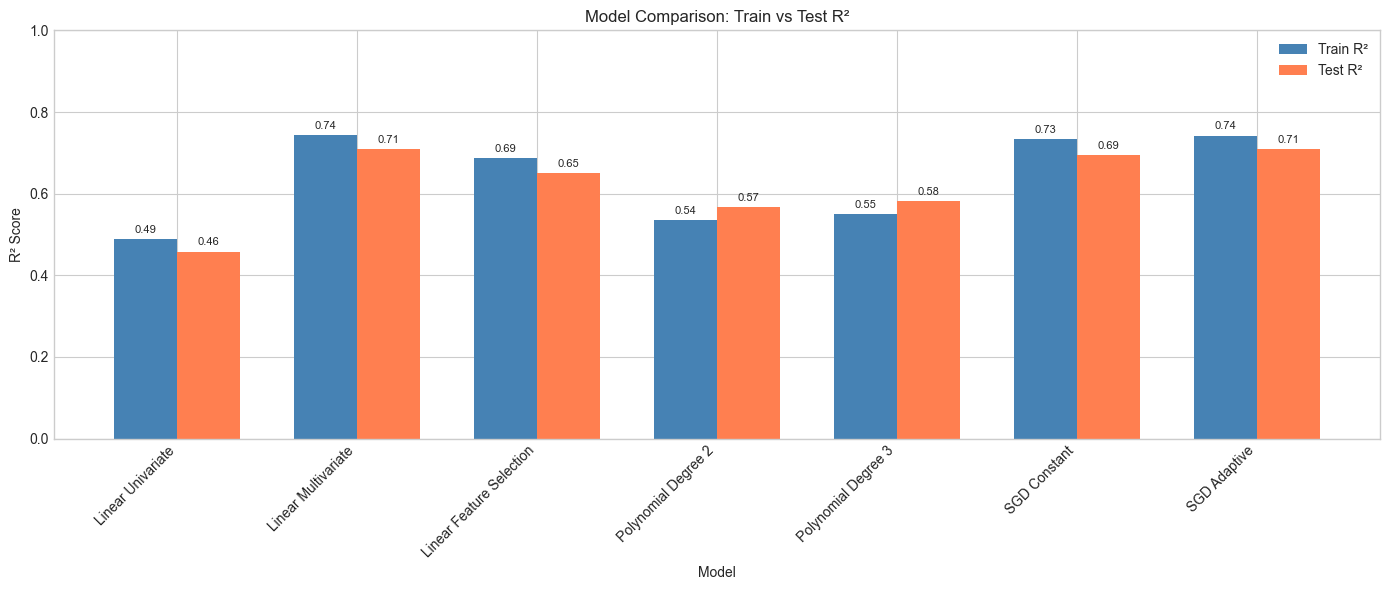

Saved: model_comparison_r2.png


In [7]:
# 4. MODEL COMPARISON - R² Scores
model_names = list(metrics.keys())
train_r2 = [metrics[m]['train_r2'] for m in model_names]
test_r2 = [metrics[m]['test_r2'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, train_r2, width, label='Train R²', color='steelblue')
bars2 = ax.bar(x + width/2, test_r2, width, label='Test R²', color='coral')

ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('Model Comparison: Train vs Test R²')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/model_comparison_r2.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: model_comparison_r2.png")

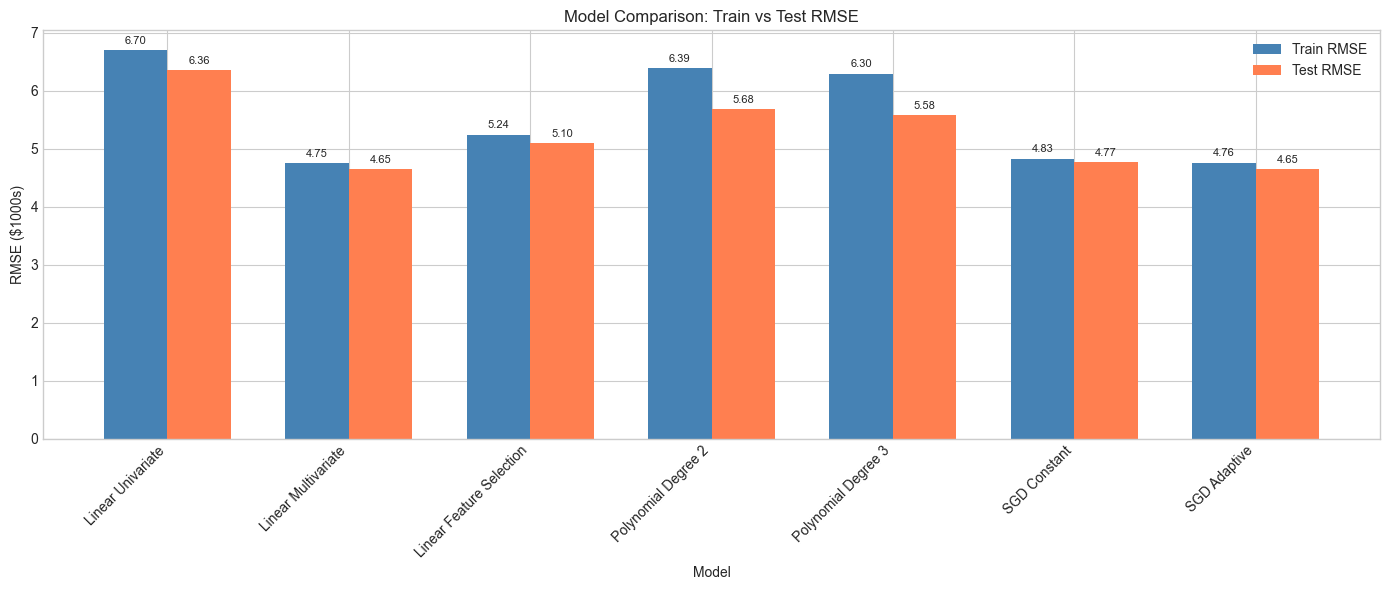

Saved: model_comparison_rmse.png


In [8]:
# 5. MODEL COMPARISON - RMSE
train_rmse = [metrics[m]['train_rmse'] for m in model_names]
test_rmse = [metrics[m]['test_rmse'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE', color='steelblue')
bars2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE', color='coral')

ax.set_xlabel('Model')
ax.set_ylabel('RMSE ($1000s)')
ax.set_title('Model Comparison: Train vs Test RMSE')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/model_comparison_rmse.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: model_comparison_rmse.png")

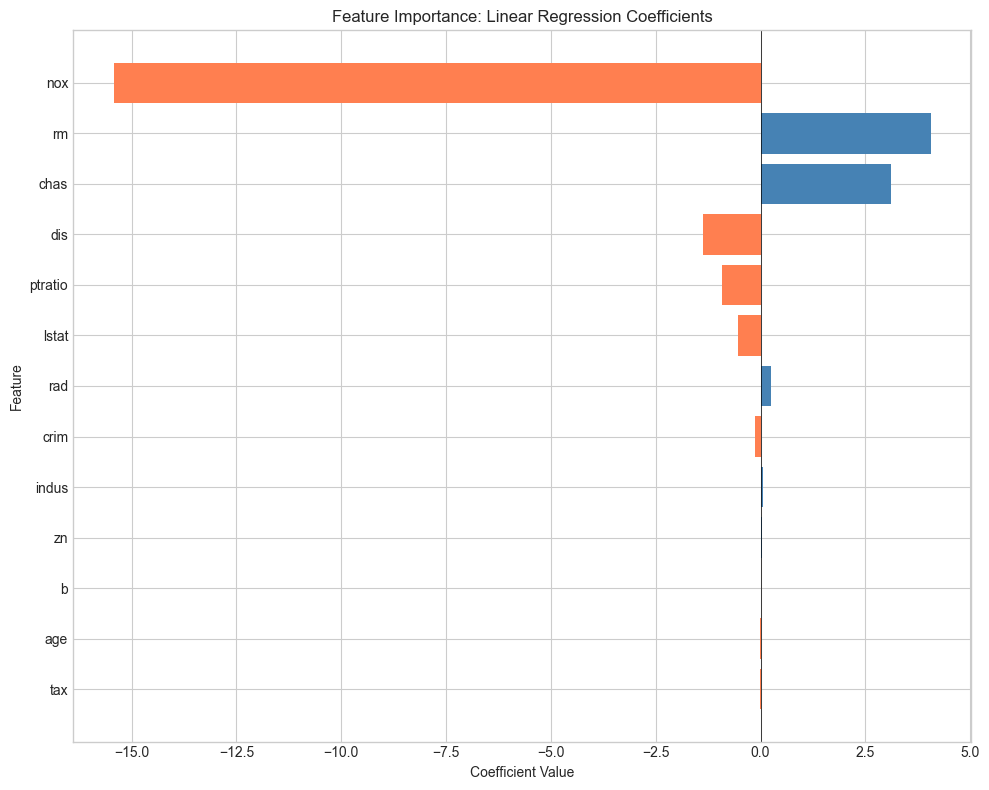

Saved: feature_importance.png


In [9]:
# 6. FEATURE IMPORTANCE (Linear Multivariate)
lr_multi = models['Linear Multivariate']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_multi.coef_
}).sort_values('coefficient', key=abs, ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['coral' if c < 0 else 'steelblue' for c in feature_importance['coefficient']]
ax.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors)
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance: Linear Regression Coefficients')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: feature_importance.png")

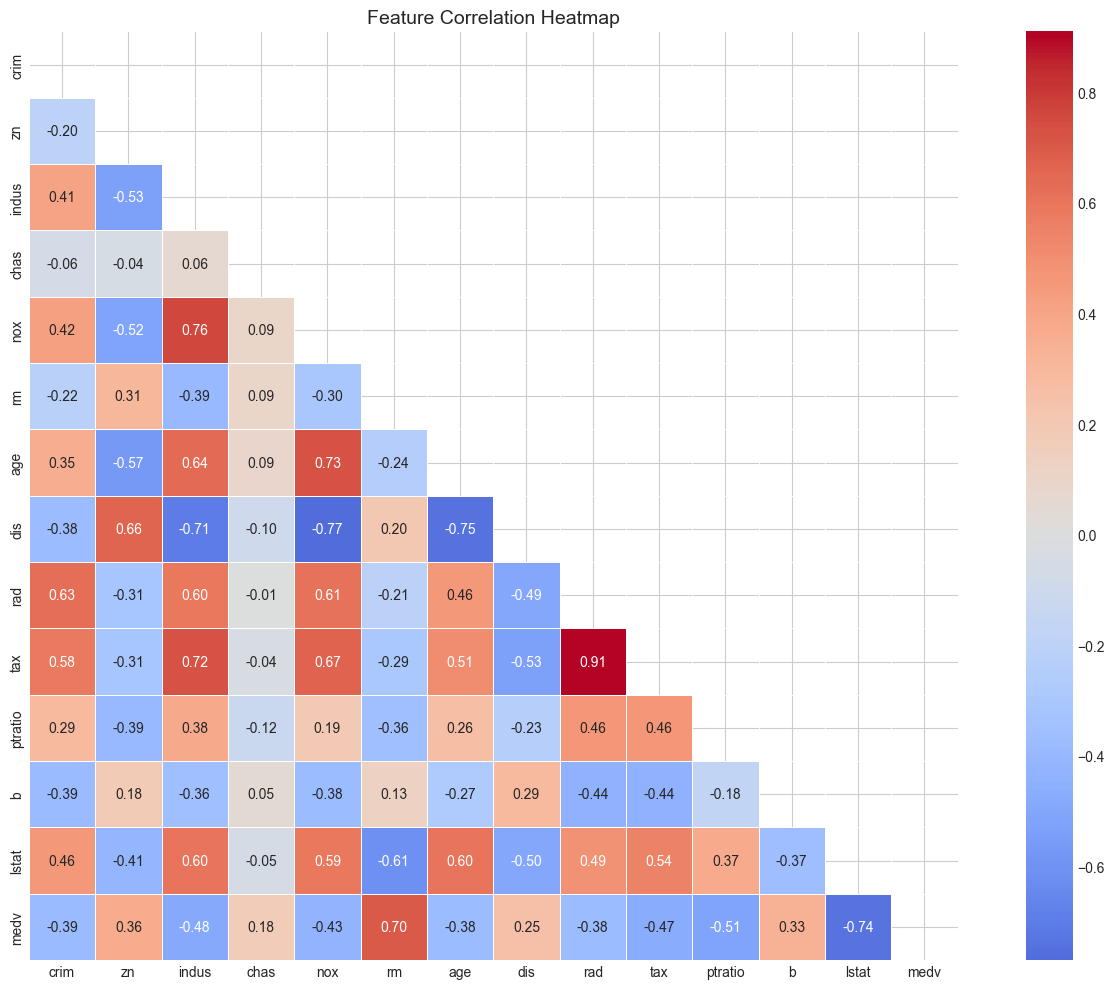

Saved: correlation_heatmap.png


In [10]:
# 7. CORRELATION HEATMAP
# Load full dataset for correlation
import kagglehub
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")
df = pd.read_csv(path + '/BostonHousing.csv')
df = df.fillna(df.median())

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: correlation_heatmap.png")

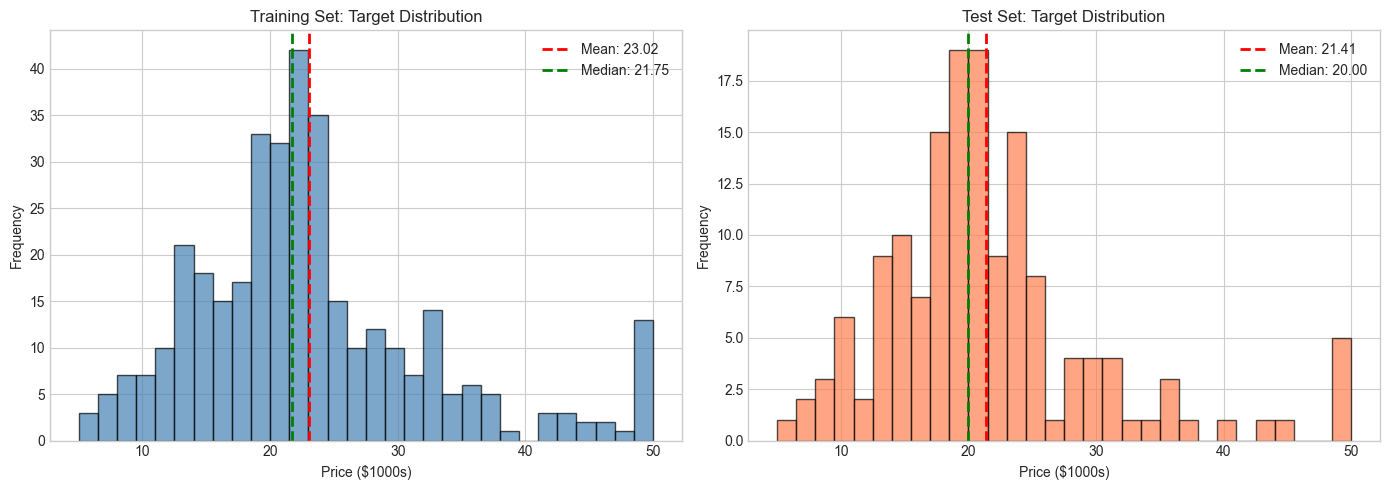

Saved: target_distribution.png


In [11]:
# 8. TARGET VARIABLE DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].hist(y_train, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_train.mean():.2f}')
axes[0].axvline(y_train.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y_train.median():.2f}')
axes[0].set_xlabel('Price ($1000s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Training Set: Target Distribution')
axes[0].legend()

# Test set
axes[1].hist(y_test, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y_test.mean():.2f}')
axes[1].axvline(y_test.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y_test.median():.2f}')
axes[1].set_xlabel('Price ($1000s)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Test Set: Target Distribution')
axes[1].legend()

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: target_distribution.png")

/var/folders/hm/mb6vy0f155x78szrrbm9gvch0000gn/T/ipykernel_58377/975731172.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_cv, rotation=45, ha='right')


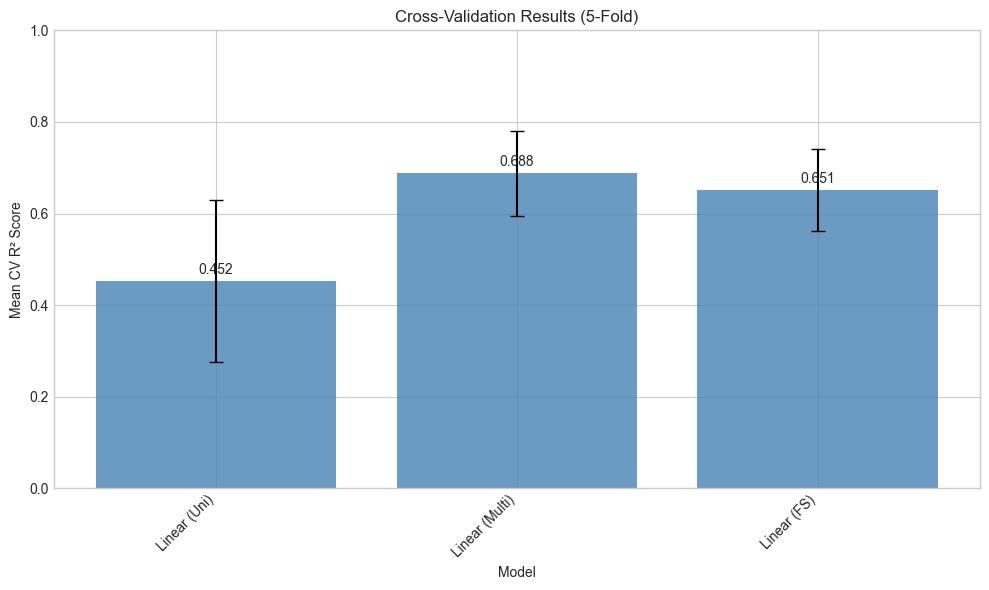

Saved: cross_validation_results.png


In [12]:
# 9. CROSS-VALIDATION RESULTS
cv_results = json.load(open(f'{RESULTS_DIR}/cv_results.json'))

model_cv = list(cv_results.keys())
cv_means = [cv_results[m]['r2_mean'] for m in model_cv]
cv_stds = [cv_results[m]['r2_std'] for m in model_cv]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_cv, cv_means, yerr=cv_stds, capsize=5, color='steelblue', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Mean CV R² Score')
ax.set_title('Cross-Validation Results (5-Fold)')
ax.set_xticklabels(model_cv, rotation=45, ha='right')
ax.set_ylim(0, 1)

for bar, mean in zip(bars, cv_means):
    height = bar.get_height()
    ax.annotate(f'{mean:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/cross_validation_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: cross_validation_results.png")

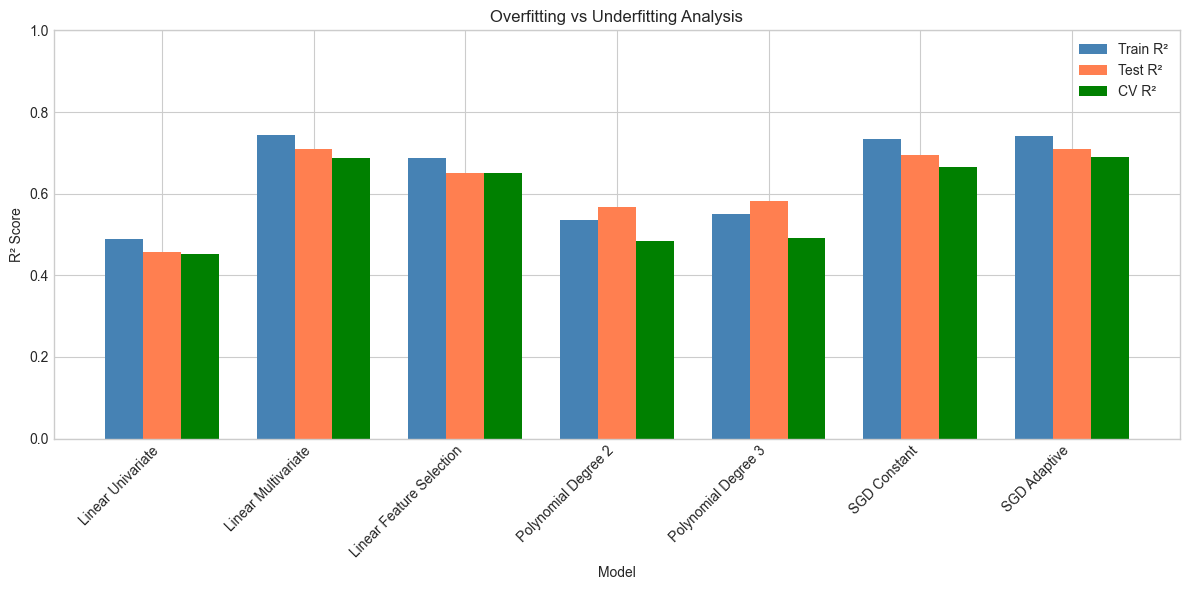

Saved: overfitting_analysis.png


In [13]:
# 10. OVERFITTING VS UNDERFITTING ANALYSIS
fig, ax = plt.subplots(figsize=(12, 6))

train_scores = [metrics[m]['train_r2'] for m in model_names]
test_scores = [metrics[m]['test_r2'] for m in model_names]
cv_scores = [metrics[m]['cv_r2_mean'] for m in model_names]

x = np.arange(len(model_names))
width = 0.25

bars1 = ax.bar(x - width, train_scores, width, label='Train R²', color='steelblue')
bars2 = ax.bar(x, test_scores, width, label='Test R²', color='coral')
bars3 = ax.bar(x + width, cv_scores, width, label='CV R²', color='green')

ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('Overfitting vs Underfitting Analysis')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)

# Add gap annotation
for i, (train, test) in enumerate(zip(train_scores, test_scores)):
    gap = train - test
    if gap > 0.1:
        ax.annotate(f'Gap: {gap:.2f}', xy=(i, max(train, test) + 0.05), 
                    ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/overfitting_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: overfitting_analysis.png")

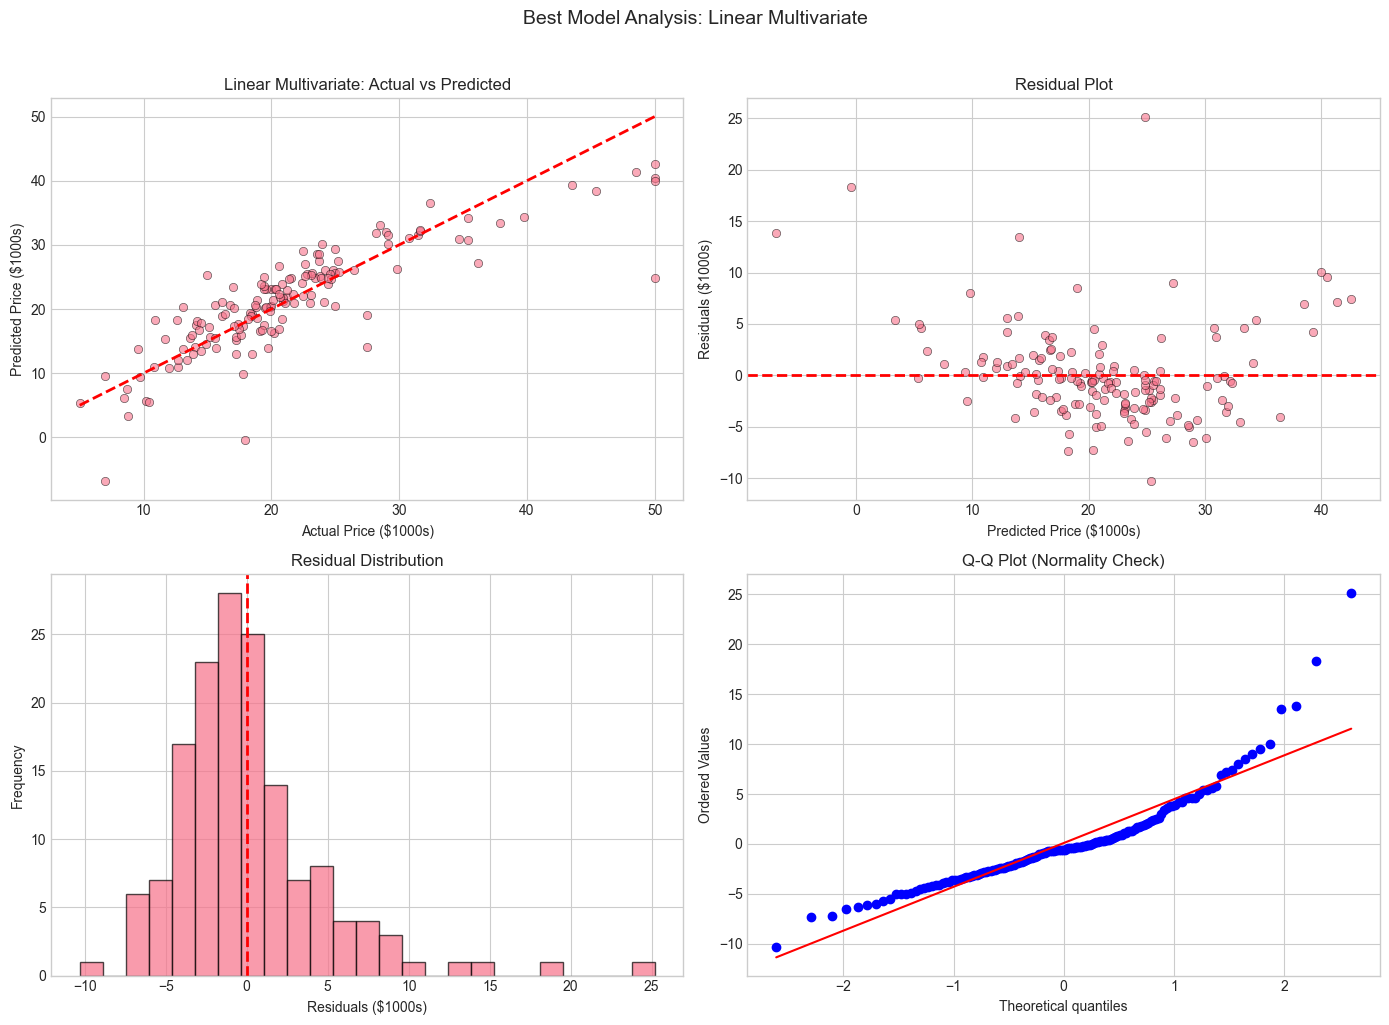

Saved: best_model_analysis.png


In [14]:
# 11. BEST MODEL DETAILED ANALYSIS
best_model_name = 'Linear Multivariate'
best_pred = predictions[best_model_name]
best_metrics = metrics[best_model_name]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, best_pred, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($1000s)')
axes[0, 0].set_ylabel('Predicted Price ($1000s)')
axes[0, 0].set_title(f'{best_model_name}: Actual vs Predicted')

# Residuals
residuals = y_test - best_pred
axes[0, 1].scatter(best_pred, residuals, alpha=0.6, edgecolors='k', linewidths=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($1000s)')
axes[0, 1].set_ylabel('Residuals ($1000s)')
axes[0, 1].set_title('Residual Plot')

# Residual distribution
axes[1, 0].hist(residuals, bins=25, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals ($1000s)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution')

# Error distribution
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')

plt.suptitle(f'Best Model Analysis: {best_model_name}', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/best_model_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: best_model_analysis.png")